In [ ]:
#an exploration of nyc public schools
#python project 1
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

In [ ]:
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [ ]:
df.describe(include='all')
#initial comparison school: New Visions Charter High School for Advanced Math
#compare regents exam scores to other schools in the dataset

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
count,212331,212331,212331,212321,212331.000000,212331.000000,212331,212331,212331,212331,212331,212331,212331,212331,212331
unique,1018,1012,6,14,NaN,NaN,748,446,992,945,992,744,1000,707,999
top,26Q430,New Visions Charter High School for Advanced Math,High school,Common Core Algebra,NaN,NaN,s,s,s,s,s,s,s,na,na
freq,490,1337,151160,29254,NaN,NaN,75222,75222,75222,75222,75222,75222,75222,142680,142680
mean,NaN,NaN,NaN,NaN,2015.956069,49.364200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.799726,93.023576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,2015.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2015.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2016.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2017.000000,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#cleanup
df.drop_duplicates(inplace=True)
drop_col=['Year'] #unnecessary if we're finding the scores
df.drop(drop_col, axis=1, inplace=True)

In [ ]:
df.replace('s', pd.NA, inplace=True) #convert s to na assuming s represents missing data
df.dropna(subset=['Mean Score'], inplace=True)

In [ ]:
#general comparison
df['Mean Score'] = pd.to_numeric(df['Mean Score'])
#mean scores in descending order
schoolScores = df.groupby('School Name')['Mean Score'].mean()
sortedScores = schoolScores.sort_values(ascending=False)
print(sortedScores)

School Name
Stuyvesant High School                        91.705926
J.H.S. 185 Edward Bleeker                     91.593182
The Anderson School                           91.475676
The Christa McAuliffe School\I.S. 187         91.071429
East Side Middle School                       90.840000
                                                ...    
Brooklyn Lab School                           51.808989
St. HOPE Leadership Academy Charter School    50.926190
Academy for Social Action                     50.148879
The Urban Assembly Unison School              48.560000
P.S. 165 Ida Posner                           48.475000
Name: Mean Score, Length: 965, dtype: float64


In [ ]:
newVisionsScore = sortedScores.loc['New Visions Charter High School for Advanced Math']
print(newVisionsScore)

63.32243093922652


In [ ]:
print(sortedScores.median())
print(sortedScores.mean())

67.1622641509434
68.71357399180795


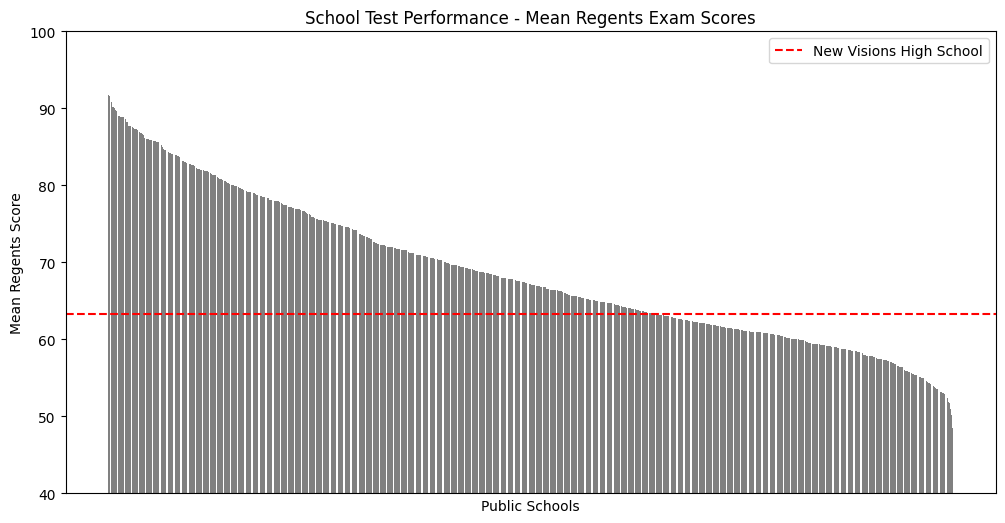

In [ ]:
#visualization
#comparing newVisionsScore to other schools
plt.figure(figsize=(12, 6))
plt.bar(sortedScores.index, sortedScores.values, color='gray')
plt.xticks([], [])  #hide x-axis labels
plt.xlabel("Public Schools")
plt.ylabel("Mean Regents Score")
plt.title("School Test Performance - Mean Regents Exam Scores")
plt.ylim(40, 100)

plt.axhline(y=newVisionsScore, color='red', linestyle='--', label='New Visions High School')
plt.legend()

plt.show()

New Visions Charter High School for Advanced Math's mean Regents Exam score sits just below the average NYC public school's exam scores.